In [1]:
#Import the libraries that will be used
import pandas as pd
import glob
import matplotlib.pyplot as plt
import numpy as np


In [2]:
path = 'water_useAZ_converted.csv'
#Making a datframe out of the 
AZ_raw = pd.read_csv(path)
AZ_raw

,state,county_ID,county_name,year,"Public Supply population served by groundwater, in thousands","Public Supply population served by surface water, in thousands","Public Supply total population served, in thousands"
0,Arizona,1,Apache County,1985,50.540,0.000,50.540
1,Arizona,1,Apache County,1990,34.100,0.150,34.250
2,Arizona,1,Apache County,1995,44.330,0.000,44.330
3,Arizona,1,Apache County,2000,41.233,0.000,41.233
4,Arizona,1,Apache County,2005,46.713,0.000,46.713
...,...,...,...,...,...,...,...
100,Arizona,27,Yuma County,1995,45.330,68.710,114.040
101,Arizona,27,Yuma County,2000,43.647,100.699,144.346
102,Arizona,27,Yuma County,2005,52.887,118.450,171.337
103,Arizona,27,Yuma County,2010,55.745,130.066,185.811


In [3]:
to_numeric = {'year':int,'Public Supply population served by groundwater, in thousands':float,'Public Supply population served by surface water, in thousands':float}
AZ_raw2 = AZ_raw.astype(to_numeric)
AZ_raw2
AZ_county_summary = pd.DataFrame(AZ_raw2.groupby("county_name").count())

In [4]:
AZ_county_summary["Average Ground Water Used per County"] = pd.DataFrame(AZ_raw2.groupby("county_name")["Public Supply population served by groundwater, in thousands"].mean())
AZ_county_summary["Average Surface Water Used per County"] = pd.DataFrame(AZ_raw2.groupby("county_name")["Public Supply population served by surface water, in thousands"].mean())

AZ_county_summary = AZ_county_summary[["Average Ground Water Used per County", "Average Surface Water Used per County"]]
AZ_county_summary

,Average Ground Water Used per County,Average Surface Water Used per County
county_name,,
Apache County,44.952571,0.021429
Cochise County,94.437286,0.024714
Coconino County,83.514571,20.426000
Gila County,40.465286,0.013857
Graham County,25.542571,0.000000
Greenlee County,5.774857,1.051429
La Paz County,8.985714,2.304857
Maricopa County,942.711143,2023.348571
Mohave County,133.363857,3.704429


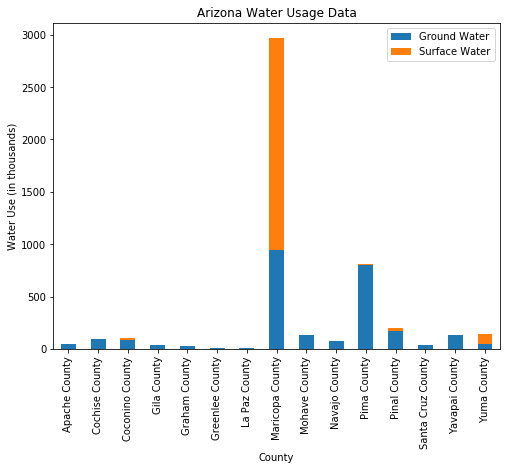

In [26]:
datapoints = AZ_county_summary[["Average Ground Water Used per County", "Average Surface Water Used per County"]]
datapoints.plot(kind="bar", stacked= True, figsize=(8,6), legend=True)
plt.title("Arizona Water Usage Data")
plt.xlabel('County')
plt.ylabel('Water Use (in thousands)')
plt.legend(["Ground Water", "Surface Water"])
plt.show()


In [6]:
maricopa_county = AZ_raw.loc[AZ_raw["county_name"] == "Maricopa County",:]

In [7]:
maricopa_county_data = maricopa_county.groupby('year').max()["Public Supply population served by surface water, in thousands"]
maricopalastcounty = pd.DataFrame(maricopa_county_data)
maricopalastcounty

,"Public Supply population served by surface water, in thousands"
year,
1985,1043.800
1990,1114.450
1995,1582.590
2000,2395.218
2005,2533.430
2010,2374.401
2015,3119.551


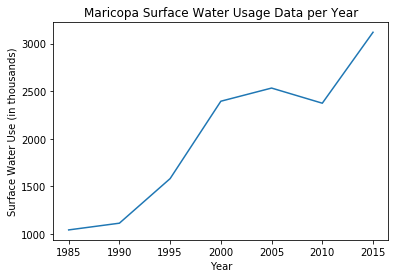

In [8]:
maricopa_county_data.plot(kind='line',x='year',y='Public Supply population served by surface water, in thousands')
plt.title("Maricopa Surface Water Usage Data per Year")
plt.xlabel('Year')
plt.ylabel('Surface Water Use (in thousands)')
plt.show()